In [1]:
import pandas as pd

In [2]:
df_total = pd.DataFrame()
for i in range(1,7,1):
    file_path = './data/부산광역시소방재난본부/부산광역시금일출동정보(2022년{}월).csv'.format(i)
    df = pd.read_csv(file_path, encoding = 'utf-8')
    df_total = pd.concat([df_total,df], axis = 0)

In [3]:
df_total

,종별,재난규모,접수시각,재난지점,관할서/관할구역
0,기타,1차출동,2022-01-16 09:39,부산광역시 강서구 강동동,강서소방서/강동119안전센터
1,구급,1차출동,2022-01-31 23:58,부산광역시 강서구 명지동,강서소방서/신호119안전센터
2,구급,1차출동,2022-01-31 23:56,부산광역시 해운대구 좌동,해운대소방서/좌동119안전센터
3,구급,1차출동,2022-01-31 23:56,부산광역시 금정구 구서동,금정소방서/부곡119안전센터
4,구급,1차출동,2022-01-31 23:55,부산광역시 사하구 하단동,사하소방서/하단119안전센터
...,...,...,...,...,...
12486,구급,1차출동,2022-06-01 00:11,부산광역시 연제구 연산동,동래소방서/양정119안전센터
12487,구급,1차출동,2022-06-01 00:11,부산광역시 북구 구포동,북부소방서/구포119안전센터
12488,구급,1차출동,2022-06-01 00:09,부산광역시 수영구 남천동,남부소방서/대연119안전센터
12489,구급,1차출동,2022-06-01 00:06,부산광역시 연제구 거제동,동래소방서/사직119안전센터


In [94]:
df_list=df_total['관할서/관할구역'].str.split('/')
df_total['관할서'] = df_list.str.get(1)

In [95]:
df_list2 = df_total['재난지점'].str.split(' ')
df_total['재난동'] = df_list2.str.get(2)

In [96]:
df_total['출동경로'] = df_total['관할구역'] + ' - ' + df_total['재난동']
df_total

,종별,재난규모,접수시각,재난지점,관할서/관할구역,관할구역,재난동,출동경로,관할서
0,기타,1차출동,2022-01-16 09:39,부산광역시 강서구 강동동,강서소방서/강동119안전센터,강동119안전센터,강동동,강동119안전센터 - 강동동,강동119안전센터
1,구급,1차출동,2022-01-31 23:58,부산광역시 강서구 명지동,강서소방서/신호119안전센터,신호119안전센터,명지동,신호119안전센터 - 명지동,신호119안전센터
2,구급,1차출동,2022-01-31 23:56,부산광역시 해운대구 좌동,해운대소방서/좌동119안전센터,좌동119안전센터,좌동,좌동119안전센터 - 좌동,좌동119안전센터
3,구급,1차출동,2022-01-31 23:56,부산광역시 금정구 구서동,금정소방서/부곡119안전센터,부곡119안전센터,구서동,부곡119안전센터 - 구서동,부곡119안전센터
4,구급,1차출동,2022-01-31 23:55,부산광역시 사하구 하단동,사하소방서/하단119안전센터,하단119안전센터,하단동,하단119안전센터 - 하단동,하단119안전센터
...,...,...,...,...,...,...,...,...,...
12486,구급,1차출동,2022-06-01 00:11,부산광역시 연제구 연산동,동래소방서/양정119안전센터,양정119안전센터,연산동,양정119안전센터 - 연산동,양정119안전센터
12487,구급,1차출동,2022-06-01 00:11,부산광역시 북구 구포동,북부소방서/구포119안전센터,구포119안전센터,구포동,구포119안전센터 - 구포동,구포119안전센터
12488,구급,1차출동,2022-06-01 00:09,부산광역시 수영구 남천동,남부소방서/대연119안전센터,대연119안전센터,남천동,대연119안전센터 - 남천동,대연119안전센터
12489,구급,1차출동,2022-06-01 00:06,부산광역시 연제구 거제동,동래소방서/사직119안전센터,사직119안전센터,거제동,사직119안전센터 - 거제동,사직119안전센터


In [97]:
df_total['출동경로'].value_counts()

연산119안전센터 - 연산동    3581
부전119안전센터 - 부전동    2678
온천119안전센터 - 온천동    2366
광안119안전센터 - 광안동    2256
우동119안전센터 - 우동     2148
                   ... 
범일119안전센터 - 대연동       1
감만119안전센터 - 남천동       1
회동119안전센터 - 우암동       1
신호119안전센터 - 전포동       1
모라119안전센터 - 연산동       1
Name: 출동경로, Length: 472, dtype: int64

In [98]:
df_total_count = df_total.groupby('출동경로').count().reset_index()[['출동경로','종별']].sort_values('종별',ascending = False).reset_index(drop = True)

In [99]:
df_total_count_30 = df_total_count.head(30)
df_total_count_30.columns = ['출동경로','출동빈도']

In [100]:
df_total_count_30

,출동경로,출동빈도
0,연산119안전센터 - 연산동,3581
1,부전119안전센터 - 부전동,2678
2,온천119안전센터 - 온천동,2366
3,광안119안전센터 - 광안동,2256
4,우동119안전센터 - 우동,2148
5,대연119안전센터 - 대연동,2122
6,좌동119안전센터 - 좌동,2082
7,다대119안전센터 - 다대동,1989
8,정관119안전센터 - 정관읍,1823
9,부전119안전센터 - 전포동,1679


In [101]:
import matplotlib.pyplot as plt

In [102]:
k = []
for x in range(len(df_total_count_30)):
    k.append(df_total_count_30['출동경로'][x])
k

['연산119안전센터 - 연산동',
 '부전119안전센터 - 부전동',
 '온천119안전센터 - 온천동',
 '광안119안전센터 - 광안동',
 '우동119안전센터 - 우동',
 '대연119안전센터 - 대연동',
 '좌동119안전센터 - 좌동',
 '다대119안전센터 - 다대동',
 '정관119안전센터 - 정관읍',
 '부전119안전센터 - 전포동',
 '괴정119안전센터 - 괴정동',
 '동삼119안전센터 - 동삼동',
 '용당119안전센터 - 용호동',
 '반여119안전센터 - 반여동',
 '구포119안전센터 - 덕천동',
 '화명119안전센터 - 화명동',
 '하단119안전센터 - 하단동',
 '초량119안전센터 - 초량동',
 '반송119안전센터 - 반송동',
 '중동119안전센터 - 중동',
 '모라119안전센터 - 모라동',
 '신호119안전센터 - 명지동',
 '신평119안전센터 - 신평동',
 '양정119안전센터 - 연산동',
 '만덕119안전센터 - 만덕동',
 '주례119안전센터 - 주례동',
 '금곡119안전센터 - 금곡동',
 '부곡119안전센터 - 부곡동',
 '구포119안전센터 - 구포동',
 '부곡119안전센터 - 장전동']

In [103]:
len(k)

30

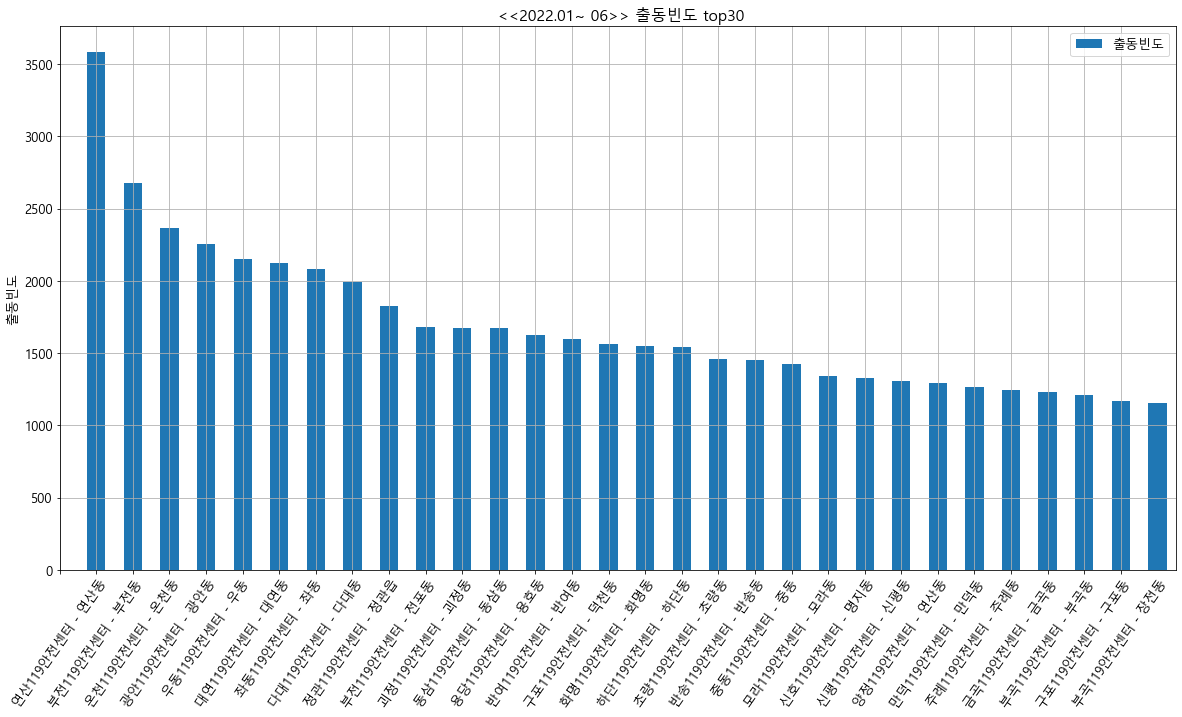

In [104]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (20, 10)
# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트지정
plt.rc("font", family = "Malgun Gothic", size=13)

# 데이터 넣기
df_total_count_30.plot(kind='bar')

plt.title(" <<2022.01~ 06>> 출동빈도 top30")
plt.ylabel("출동빈도")

# x축 범위?
a = list(range(0,29,1))
plt.xticks([i for i in range(-1,29,1)], k, rotation = 55)

# 범례 위치 변경하기
plt.legend(loc="upper right")
# 그래프 내에 그리드선 표시하기
plt.grid(True)

plt.show()